# Komplexitätstheorie und Public-Key-Kryptographie

In der Public-Key-Kryptographie verwendet man zum Verschlüsseln eine
Einwegfunktion mit Hintertür. Das ist eine Funktion, die einfach zu berechnen,
aber ohne Kenntnis der Hintertür sehr schwer umzukehren ist.  
Als Modell für diese Art Verschlüsselung wurde im Unterricht die 
[Verschlüsselung mit Hilfe eines Graphen](../250317/asymmetrie.md) verwendet.
Allerdings ist in desem Beispiel der Unterschied im Aufwand für die
Verschlüsselung und die Entschlüsselung nicht gross genug. Damit dies beurteilt
werden kann, muss die Komplexität der Verschlüsselung und der Entschlüsselung
miteinander verglichen werden können. Die Beschreibung der Komplexität von
Algorithmen ist das Thema der Komplexitätstheorie.

## Komplexitätstheorie

In der Komplexitätstheorie wird die der Aufwand von Algorithmen unter den
Aspekten des Rechnen- und Speicheraufwands untersucht. Im Zusammenahng mit der
Kryptographie interessiert in erster Linie der Rechenaufwand. Ein
Verschlüsselungsverfahren gilt als sicher, wenn der Aufwand für die
Entschlüsslelung in Unkenntnis der Hintertür so viel grösser ist als der Aufwand
für die Verschlüsslung, dass innert nützlicher Frist die Entschlüsselung nicht
möglich ist.

Der Rechenaufwand ist nicht zu verwechseln mit der Rechenzeit auf einem
konkreten Computer. Die Komplexität eines Algorithmus soll unabhängig von einem
konkreten Rechner beurteilt werden können. Aus diesem Grund wird die Komplexität
anhand der erforderlichen Rechenschritte in Abhängigkeit von der zu
verarbeitenden Datenmenge gemessen.  
Der Rechenaufwand in Abhängigkeit der Eingabgrösse kann dabei in folgende
Klassen eingeteilt werden:

* konstant: $\mathcal{O}(1)$
* logarithmisch: $\mathcal{O}(\log n)$
* linear: $\mathcal{O}(n)$
* quadratisch: $\mathcal{O}(n^2)$
* exponentiell: $\mathcal{O}(2^n)$

Die ersten vier Klassen werden als polynomiell bezeichnet und gelten in der
Praxis als effizient, d.h. lösbar. Die Klasse der exponentiellen Algorithmen
gilt als nicht effizient. Das heisst nicht, dass exponentielle Algorithmen
theoretisch nicht berechenbar sind, ihr Rechenaufwand ist allerdings so gross,
dass sie für grosse Eingaben nicht praktikabel sind.

Weshalb das so ist, zeigen die folgenden beiden Grafiken. Sie zeigen links die
das Wachstum der Rechenzeit in Abhängigkeit von der Eingabegrösse bis zu $n=5$
und rechts bis zu $n=50$. Wobei anzumerken ist, dass 50 noch keine grosse
Eingabe ist.

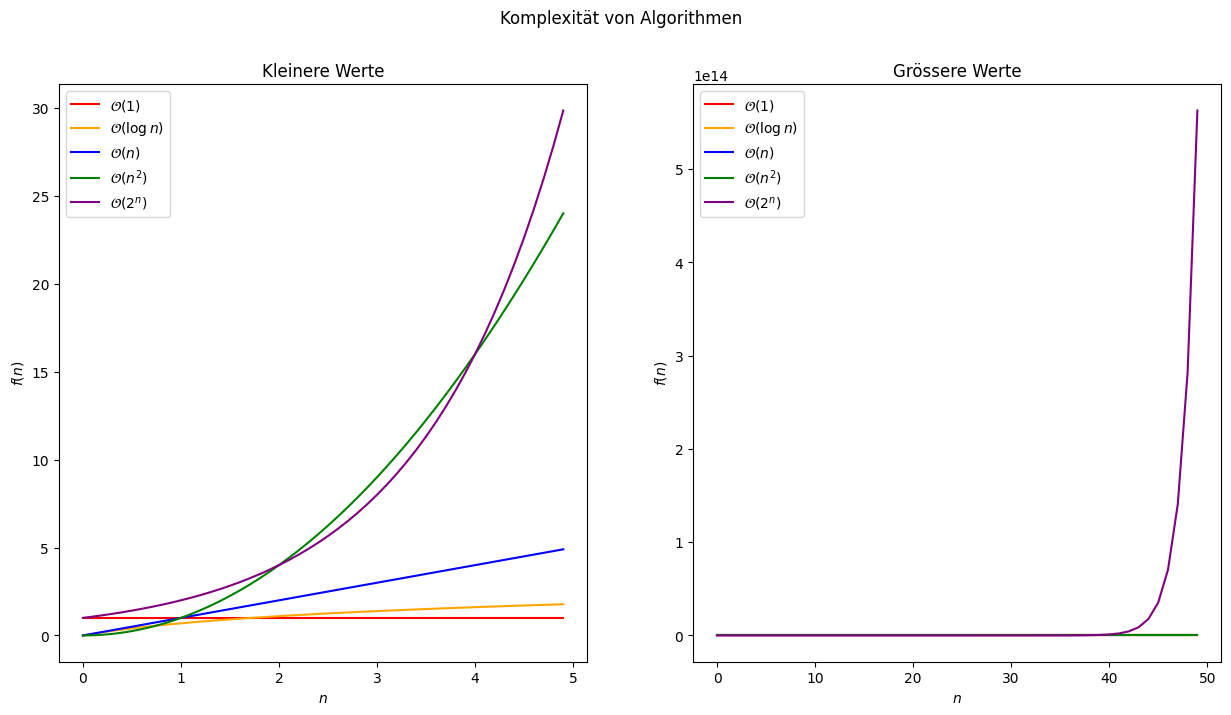

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 50, 1)
y_konst = np.ones(len(x), dtype=int)
y_lin = x
y_log = np.log(x + 1)  # Avoid log(0) by adding 1
y_quad = x**2
y_exp = 2**x

x_klein = np.arange(0, 5, 0.1)
y_klein_konst = np.ones(len(x_klein), dtype=int)
y_klein_lin = x_klein
y_klein_log = np.log(x_klein + 1)  # Avoid log(0) by adding 1
y_klein_quad = x_klein**2
y_klein_exp = 2**x_klein

cm = 1/2.54  # centimeters in inches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))

fig.suptitle('Komplexität von Algorithmen')

ax1.set_title(r'$n=5$') 

ax1.plot(x_klein, y_klein_konst, label=r'$\mathcal{O}(1)$', color='red')
ax1.plot(x_klein, y_klein_log, label=r'$\mathcal{O}(\log n)$', color='orange')
ax1.plot(x_klein, y_klein_lin, label=r'$\mathcal{O}(n)$', color='blue')
ax1.plot(x_klein, y_klein_quad, label=r'$\mathcal{O}(n^2)$', color='green')
ax1.plot(x_klein, y_klein_exp, label=r'$\mathcal{O}(2^n)$', color='purple')

ax1.legend()
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$f(n)$')

ax2.set_title(r'$n=50$')

ax2.plot(x, y_konst, label=r'$\mathcal{O}(1)$', color='red')
ax2.plot(x, y_log, label=r'$\mathcal{O}(\log n)$', color='orange')
ax2.plot(x, y_lin, label=r'$\mathcal{O}(n)$', color='blue')
ax2.plot(x, y_quad, label=r'$\mathcal{O}(n^2)$', color='green')
ax2.plot(x, y_exp, label=r'$\mathcal{O}(2^n)$', color='purple')

ax2.legend()
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$f(n)$')

plt.show()

## Anwendung auf die Graphenverschlüsselung

Die Verschlüsselung mit Hilfe eines Graphen (wie im Unterricht besprochen)
weist für die Verschlüsselung eine Komplexität von $\mathcal{O}(n^2)$ auf, wobei
$n$ die Anzahl Knoten im Graphen ist. Dies ergibt sich aus der Notwendigkeit,
für jeden Knoten die Summe seiner Nachbarn zu berechnen. Die Entschlüsselung im
Gegensatz dazu hat eine Komplexität von mindestens $\mathcal{O}(n^3)$. Das
Gleichungssystem für die Entschlüsselung ohne kenntnis der Hintertür wächst mit
der Anzahl Knoten im Graphen. Die genaue Komplexität hängt dabei von der
konkreten Ausgestaltung des Graphen ab.

Dies macht die Graphenverschlüsselung bei genügend grossem Graphen manuell nicht
mehr entschlüsselbar. Da die Lösung von Gleichungssystem in polinomieller Zeit
möglich ist, ist die Entschlüsselung mit Hilfe eines Computers nach wie vor
möglich.  
Die Verschlüsselung mit einem Graphen ist so wie beschrieben nicht als sicher zu
bezeichnen.

Um sichere Verfahren für die Public-Key-Kryptographie zu finden, sind daher
andere Ansätze erforderlich. Diese basieren in der Regel auf Grundlagen der
Zahlentheorie. 

## Genügend komplexe Algorithmen

Ein Public-Key-Kryptosystem, das den Anforderungen an ein sicheres Verfahren
genügt, ist das RSA-Verfahren. Es basiert auf der Schweirigkeit, grosse Zahlen in
ihre Primfaktoren zu zerlegen.

Benannt ist das Verfahren nach den drei Erfindern Ron **R**ivest, Adi **S**hamir und
Leonard **A**dleman. Es wurde 1977 veröffentlicht und ist bis heute eines der sichersten
Verfahren.

Für die Anwendung des RSA-Verfahrens muss als erstes ein Paar von Primzahlen $p$
und $q$ miteinander multipliziert werden. Das Produkt $n = p \cdot q$ ist der
sog. RSA-Modul. Damit das Verfahren sicher ist, muss $p$ und $q$ genügend gross
gewählt werden. Die Sicherheit des Verfahrens hängt von der Grösse der Primzahlen
ab. Damit das Verfahren sicher ist, müssen die Primzahlen mindestens 1024 Bit
lang sein.

In einem zweiten Schritt ist eine Zahl $e$ zu wählen. Die Zahl $e$ muss
die folgende Bedingung erfüllen: $1 < e < (p-1)(q-1)$ und $e$ muss teilerfremd
zu $(p-1)(q-1)$ sein. Die Zahl $e$ ist der sog. Verschlüsslungsexponent.
Zusammen mit dem RSA-Modul $n$ bildet sie den öffentlichen Schlüssel.


Um eine Zahl zu verschlüsseln, wird die folgende Berechnung durchgeführt:

$$
c = m^e \mod n
$$
wobei $m$ die zu verschlüsselnde Zahl und $c$ die verschlüsselte Zahl ist.

Zur Entschlüsslelung wird der sog. Entschlüsselungsexponent $d$ benötigt.

Dieser Berechnet sich mit Hilfe des erweiterten Euklidschen Algorithmus. Dieser
besagt:

$$
ggT(a,b) = pa + sb
$$

Um $p$ und $s$ zu berechnen, wird zunächst $ggT(a,b)$ mit dem Euklidschen
Algorithmus berechnet. Dabei werden die Anzahl Schritte mit $n$ bezeichnet. Mit
diesen Bezeichnunge werden zwei Zahlenfolgen $\{p_k\}$ und $\{s_k\}$ berechnet.
Dabei geht man folgendermassen vor:

* Man setzt $p_0 = 1$, $p_1 = 0$, $s_0 = 0$ und $s_1 = 1$.
* Für $k = 2, 3, \ldots, n$ berechnet man
  
  $p_k = p_{k−2} − q_{k−1}\cdot p_{k−1}$    
  und      
  $s_k = s_{k−2} − q_{k−1}\cdot s_{k−1}$

Dies führt zur gesuchten Zerlegung $ggT(a, b) = p_n \cdot a + s_n \cdot b$.

Falls $s_n > 0\ |\ d = s_n$, andernfalls ist $d = s_n + (p-1)(q-1)$.

Zusammen mit dem RSA-Modul $n$ bildet $d$ den privaten Schlüssel.

Die Entschlüsselung erfolgt mit der Formel:

$$
t = c^d \mod n
$$



Der RSA-Algorithmus wird in der Praxis oft in Kombination mit weiteren Verfahren
angewendet. Er dient beispielsweis zur Übertragung eines symmetrischen
Sitzungsschlüssels bei einer HTTPS Übertragung im Internet.